## Initialization of the Scripts

In [1]:
%pip install fredapi
%pip install ipympl
%pip install --upgrade yfinance
%pip install mplfinance 
%pip install fear_and_greed
%pip install PyQt5
%pip install plotly
%pip install tensorflow keras scikit-learn
%pip install requests
%pip install seaborn

from dateutil import parser
import pytz
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
import fear_and_greed
from fredapi import Fred
import datetime
import time
import numpy as np
import yfinance as yf
import pandas as pd
import warnings
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,Input,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
from matplotlib import pyplot as plt
import mplfinance as mpf
try:
    !git clone https://github.com/cyp9313/My_Stock_Analysis_Tools.git
    import os
    os.chdir('/content/My_Stock_Analysis_Tools')
except Exception as e:
    print('Not Possible to clone git repo!')
from sp500_calc_test import Main_Calcn,MonthlyAndWeeklySIPReturnCalcn,MA_Invst_Return_Calcn,BollBandsReturnCalcn,MacdReturnCalcn,MA05MA10ReturnCalcn,MA_SIPReturnCalcn
from SIPReturnCalcn import SIPReturnCalcn
from EarningsInfo import CallEarningsInfo

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Not Possible to clone git repo!


fatal: destination path 'My_Stock_Analysis_Tools' already exists and is not an empty directory.


## Plot US Daily Treasury Yield Curve Rates in the past 365 days (US10YT & US20YT)
## Plot historical curve of VIX in the past 365 days
## Plot historical curve of SP500 price in the past 365 days
## Plot historical curve of Nasdaq100 price in the past 365 days
## Plot historical curve of Bit Coin price in the past 365 days
### [Fear and Greed Index](https://www.cnn.com/markets/fear-and-greed?utm_source=hp)
### [finviz](https://finviz.com/)
### [StonksUp](https://stonksup.io/)
### [Yahoo Finance](https://finance.yahoo.com/)
### [Earnings Whispers](https://www.earningswhispers.com/)

In [6]:
# 显示Fear and Greed Index
index = fear_and_greed.get()
print(f'Fear and Greed Index = {index.value:.2f},{index.description}')

# 获取 US10YT, US20YT数据
us10yt = yf.Ticker("^TNX")
us20yt = yf.Ticker("^TYX")
# 获取VIX的最新数据
vix = yf.Ticker('^VIX')

end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)

data_us10yt = us10yt.history(start=start_date, end=end_date)
data_us20yt = us20yt.history(start=start_date, end=end_date)
data_vix = vix.history(start=start_date, end=end_date)
data_sp500 = yf.Ticker("^GSPC").history(start=start_date, end=end_date)
data_nasdaq100 = yf.Ticker("^NDX").history(start=start_date, end=end_date)
data_rus2000 = yf.Ticker("^RUT").history(start=start_date, end=end_date)
data_csi300 = yf.Ticker("510300.SS").history(start=start_date, end=end_date)
data_btc = yf.Ticker("BTC-USD").history(start=start_date, end=end_date)
data_gold = yf.Ticker("GC=F").history(start=start_date, end=end_date)

# 获取最新日期的收益率
# latest_date = data_us10yt.index[-1]
latest_yield_us10yt = data_us10yt['Close'][-1]
latest_yield_us20yt = data_us20yt['Close'][-1]
latest_vix = data_vix['Close'][-1]
latest_sp500 = data_sp500['Close'][-1]
latest_nasdaq100 = data_nasdaq100['Close'][-1]
latest_rus2000 = data_rus2000['Close'][-1]
latest_csi300 = data_csi300['Close'][-1]
latest_btc = data_btc['Close'][-1]
latest_gold = data_gold['Close'][-1]

for data in [data_sp500, data_nasdaq100, data_rus2000, data_csi300, data_btc, data_gold, data_us10yt, data_us20yt, data_vix]:
    data['Pct_Change'] = data['Close'].pct_change().fillna(0) * 100  # 计算百分比变化并处理NaN

# 创建上涨和下跌的交易量柱状图
def create_volume_bar(data):
    colors = ['green' if data['Open'][i] < data['Close'][i] else 'red' for i in range(len(data))]
    return go.Bar(x=data.index, y=data['Volume'], marker_color=colors, name='Volume')

# 绘制 US Treasury Yields 和 VIX 图表
fig1 = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)
# fig1.add_trace(go.Candlestick(x=data_us10yt.index, open=data_us10yt['Open'], high=data_us10yt['High'],
#                               low=data_us10yt['Low'], close=data_us10yt['Close'], name='US10YT'), row=1, col=1)
fig1.add_trace(go.Candlestick(
    x=data_us10yt.index,
    open=data_us10yt['Open'],
    high=data_us10yt['High'],
    low=data_us10yt['Low'],
    close=data_us10yt['Close'],
    name='US10YT',
    text=[f'涨跌幅: {pct:.2f}%' for pct in data_us10yt['Pct_Change']],  # 新增hover文本
    hoverinfo='x+y+text'  # 显示日期+价格+自定义文本
), row=1, col=1)
# fig1.add_trace(go.Candlestick(x=data_us20yt.index, open=data_us20yt['Open'], high=data_us20yt['High'],
#                               low=data_us20yt['Low'], close=data_us20yt['Close'], name='US20YT'), row=1, col=1)
fig1.add_trace(go.Candlestick(
    x=data_us20yt.index,
    open=data_us20yt['Open'],
    high=data_us20yt['High'],
    low=data_us20yt['Low'],
    close=data_us20yt['Close'],
    name='US20YT',
    text=[f'涨跌幅: {pct:.2f}%' for pct in data_us20yt['Pct_Change']],  # 新增hover文本
    hoverinfo='x+y+text'  # 显示日期+价格+自定义文本
), row=1, col=1)
fig1.add_trace(go.Scatter(x=data_us10yt.index, y=data_us10yt['Close'], mode='lines', name=f'US10YT ({data_us10yt.index[-1].date()}:{latest_yield_us10yt:.2f}%)'),
               row=1, col=1)
fig1.add_trace(go.Scatter(x=data_us20yt.index, y=data_us20yt['Close'], mode='lines', name=f'US20YT ({data_us20yt.index[-1].date()}:{latest_yield_us20yt:.2f}%)'),
               row=1, col=1)
# fig1.add_trace(go.Candlestick(x=data_vix.index, open=data_vix['Open'], high=data_vix['High'],
#                               low=data_vix['Low'], close=data_vix['Close'], name='VIX'), row=2, col=1)
fig1.add_trace(go.Candlestick(
    x=data_vix.index,
    open=data_vix['Open'],
    high=data_vix['High'],
    low=data_vix['Low'],
    close=data_vix['Close'],
    name='VIX',
    text=[f'涨跌幅: {pct:.2f}%' for pct in data_vix['Pct_Change']],  # 新增hover文本
    hoverinfo='x+y+text'  # 显示日期+价格+自定义文本
), row=2, col=1)
fig1.add_trace(go.Scatter(x=data_vix.index, y=data_vix['Close'], mode='lines', name=f'VIX ({data_vix.index[-1].date()}:{latest_vix:.2f})'),
               row=2, col=1)
fig1.add_trace(go.Scatter(x=data_vix.index, y=data_vix['Close'].rolling(window=20).mean(), mode='lines',
                          name='20-Day MAV of VIX', line=dict(color='green', dash='dash')), row=2, col=1)
fig1.add_trace(go.Scatter(x=data_vix.index, y=data_vix['Close'].rolling(window=20).mean() +
                          2 * data_vix['Close'].rolling(window=20).std(), mode='lines', name='BB Upper Lane of VIX',
                          line=dict(color='black', dash='solid')), row=2, col=1)
fig1.add_trace(go.Scatter(x=data_vix.index, y=data_vix['Close'].rolling(window=20).mean() -
                          2 * data_vix['Close'].rolling(window=20).std(), mode='lines', name='BB Bottom Lane of VIX',
                          line=dict(color='black', dash='solid')), row=2, col=1)

fig1.update_layout(title='US Treasury Yields and VIX (Last Year)', yaxis_title='Yield',yaxis2_title='VIX Price', height=800, 
                   xaxis=dict(showgrid=True,fixedrange=False,rangeslider=dict(visible=False)), yaxis=dict(showgrid=True,fixedrange=False),
                   xaxis2=dict(showgrid=True,fixedrange=False,rangeslider=dict(visible=False)), yaxis2=dict(showgrid=True,fixedrange=False))
fig1.show()

# 绘制 SP500 图表
fig2 = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.8, 0.2])
# fig2.add_trace(go.Candlestick(x=data_sp500.index, open=data_sp500['Open'], high=data_sp500['High'],
#                               low=data_sp500['Low'], close=data_sp500['Close'], name='SP500'), row=1, col=1)
fig2.add_trace(go.Candlestick(
    x=data_sp500.index,
    open=data_sp500['Open'],
    high=data_sp500['High'],
    low=data_sp500['Low'],
    close=data_sp500['Close'],
    name='SP500',
    text=[f'涨跌幅: {pct:.2f}%' for pct in data_sp500['Pct_Change']],  # 新增hover文本
    hoverinfo='x+y+text'  # 显示日期+价格+自定义文本
), row=1, col=1)
fig2.add_trace(go.Scatter(x=data_sp500.index, y=data_sp500['Close'].rolling(window=20).mean() +
                          2 * data_sp500['Close'].rolling(window=20).std(), mode='lines', name='BB Upper Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig2.add_trace(go.Scatter(x=data_sp500.index, y=data_sp500['Close'].rolling(window=20).mean() -
                          2 * data_sp500['Close'].rolling(window=20).std(), mode='lines', name='BB Bottom Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig2.add_trace(go.Scatter(x=data_sp500.index, y=data_sp500['Close'].rolling(window=5).mean(), mode='lines',
                          name='5-Day MAV', line=dict(color='blue', dash='dash')), row=1, col=1)
fig2.add_trace(go.Scatter(x=data_sp500.index, y=data_sp500['Close'].rolling(window=10).mean(), mode='lines',
                          name='10-Day MAV', line=dict(color='orange', dash='dash')), row=1, col=1)
fig2.add_trace(go.Scatter(x=data_sp500.index, y=data_sp500['Close'].rolling(window=20).mean(), mode='lines',
                          name='20-Day MAV', line=dict(color='green', dash='dash')), row=1, col=1)
fig2.add_trace(go.Scatter(x=data_sp500.index, y=data_sp500['Close'].rolling(window=50).mean(), mode='lines',
                          name='50-Day MAV', line=dict(color='magenta', dash='dash')), row=1, col=1)
fig2.add_trace(go.Scatter(x=data_sp500.index, y=data_sp500['Close'].rolling(window=100).mean(), mode='lines',
                          name='100-Day MAV', line=dict(color='cyan', dash='dash')), row=1, col=1)
fig2.add_trace(go.Scatter(x=data_sp500.index, y=data_sp500['Close'].rolling(window=200).mean(), mode='lines',
                          name='200-Day MAV', line=dict(color='black', dash='dash')), row=1, col=1)
fig2.add_trace(go.Scatter(x=data_sp500.index, y=data_sp500['Close'], mode='markers',
                          marker=dict(color='red', size=6), name=f'Newest Value ({data_sp500.index[-1].date()}:{latest_sp500:.2f})'),
               row=1, col=1)
fig2.add_trace(create_volume_bar(data_sp500), row=2, col=1)

fig2.update_layout(title='SP500 (Last Year)', yaxis_title='SP500 Price', height=800, 
                   xaxis=dict(showgrid=True,fixedrange=False,rangeslider=dict(visible=False)), yaxis=dict(showgrid=True,fixedrange=False)) 
fig2.show()

# 绘制 Nasdaq100 图表
fig3 = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.8, 0.2])
# fig3.add_trace(go.Candlestick(x=data_nasdaq100.index, open=data_nasdaq100['Open'], high=data_nasdaq100['High'],
#                               low=data_nasdaq100['Low'], close=data_nasdaq100['Close'], name='Nasdaq100'), row=1, col=1)
fig3.add_trace(go.Candlestick(
    x=data_nasdaq100.index,
    open=data_nasdaq100['Open'],
    high=data_nasdaq100['High'],
    low=data_nasdaq100['Low'],
    close=data_nasdaq100['Close'],
    name='Nasdaq100',
    text=[f'涨跌幅: {pct:.2f}%' for pct in data_nasdaq100['Pct_Change']],  # 新增hover文本
    hoverinfo='x+y+text'  # 显示日期+价格+自定义文本
), row=1, col=1)
fig3.add_trace(go.Scatter(x=data_nasdaq100.index, y=data_nasdaq100['Close'].rolling(window=20).mean() +
                          2 * data_nasdaq100['Close'].rolling(window=20).std(), mode='lines', name='BB Upper Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig3.add_trace(go.Scatter(x=data_nasdaq100.index, y=data_nasdaq100['Close'].rolling(window=20).mean() -
                          2 * data_nasdaq100['Close'].rolling(window=20).std(), mode='lines', name='BB Bottom Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig3.add_trace(go.Scatter(x=data_nasdaq100.index, y=data_nasdaq100['Close'].rolling(window=5).mean(), mode='lines',
                          name='5-Day MAV', line=dict(color='blue', dash='dash')), row=1, col=1)
fig3.add_trace(go.Scatter(x=data_nasdaq100.index, y=data_nasdaq100['Close'].rolling(window=10).mean(), mode='lines',
                          name='10-Day MAV', line=dict(color='orange', dash='dash')), row=1, col=1)
fig3.add_trace(go.Scatter(x=data_nasdaq100.index, y=data_nasdaq100['Close'].rolling(window=20).mean(), mode='lines',
                          name='20-Day MAV', line=dict(color='green', dash='dash')), row=1, col=1)
fig3.add_trace(go.Scatter(x=data_nasdaq100.index, y=data_nasdaq100['Close'].rolling(window=50).mean(), mode='lines',
                          name='50-Day MAV', line=dict(color='magenta', dash='dash')), row=1, col=1)
fig3.add_trace(go.Scatter(x=data_nasdaq100.index, y=data_nasdaq100['Close'].rolling(window=100).mean(), mode='lines',
                          name='100-Day MAV', line=dict(color='cyan', dash='dash')), row=1, col=1)
fig3.add_trace(go.Scatter(x=data_nasdaq100.index, y=data_nasdaq100['Close'].rolling(window=200).mean(), mode='lines',
                          name='200-Day MAV', line=dict(color='black', dash='dash')), row=1, col=1)
fig3.add_trace(go.Scatter(x=data_nasdaq100.index, y=data_nasdaq100['Close'], mode='markers',
                          marker=dict(color='red', size=6), name=f'Newest Value ({data_nasdaq100.index[-1].date()}:{latest_nasdaq100:.2f})'),
               row=1, col=1)
fig3.add_trace(create_volume_bar(data_nasdaq100), row=2, col=1)

fig3.update_layout(title='Nasdaq100 (Last Year)', yaxis_title='Nasdaq100 Price', height=800, 
                   xaxis=dict(showgrid=True,fixedrange=False,rangeslider=dict(visible=False)), yaxis=dict(showgrid=True,fixedrange=False)) 
fig3.show()

# 绘制 Russell2000 图表
fig4 = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.8, 0.2])
# fig4.add_trace(go.Candlestick(x=data_rus2000.index, open=data_rus2000['Open'], high=data_rus2000['High'],
#                               low=data_rus2000['Low'], close=data_rus2000['Close'], name='RUS2000'), row=1, col=1)
fig4.add_trace(go.Candlestick(
    x=data_rus2000.index,
    open=data_rus2000['Open'],
    high=data_rus2000['High'],
    low=data_rus2000['Low'],
    close=data_rus2000['Close'],
    name='RUS2000',
    text=[f'涨跌幅: {pct:.2f}%' for pct in data_rus2000['Pct_Change']],  # 新增hover文本
    hoverinfo='x+y+text'  # 显示日期+价格+自定义文本
), row=1, col=1)
fig4.add_trace(go.Scatter(x=data_rus2000.index, y=data_rus2000['Close'].rolling(window=20).mean() +
                          2 * data_rus2000['Close'].rolling(window=20).std(), mode='lines', name='BB Upper Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig4.add_trace(go.Scatter(x=data_rus2000.index, y=data_rus2000['Close'].rolling(window=20).mean() -
                          2 * data_rus2000['Close'].rolling(window=20).std(), mode='lines', name='BB Bottom Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig4.add_trace(go.Scatter(x=data_rus2000.index, y=data_rus2000['Close'].rolling(window=5).mean(), mode='lines',
                          name='5-Day MAV', line=dict(color='blue', dash='dash')), row=1, col=1)
fig4.add_trace(go.Scatter(x=data_rus2000.index, y=data_rus2000['Close'].rolling(window=10).mean(), mode='lines',
                          name='10-Day MAV', line=dict(color='orange', dash='dash')), row=1, col=1)
fig4.add_trace(go.Scatter(x=data_rus2000.index, y=data_rus2000['Close'].rolling(window=20).mean(), mode='lines',
                          name='20-Day MAV', line=dict(color='green', dash='dash')), row=1, col=1)
fig4.add_trace(go.Scatter(x=data_rus2000.index, y=data_rus2000['Close'].rolling(window=50).mean(), mode='lines',
                          name='50-Day MAV', line=dict(color='magenta', dash='dash')), row=1, col=1)
fig4.add_trace(go.Scatter(x=data_rus2000.index, y=data_rus2000['Close'].rolling(window=100).mean(), mode='lines',
                          name='100-Day MAV', line=dict(color='cyan', dash='dash')), row=1, col=1)
fig4.add_trace(go.Scatter(x=data_rus2000.index, y=data_rus2000['Close'].rolling(window=200).mean(), mode='lines',
                          name='200-Day MAV', line=dict(color='black', dash='dash')), row=1, col=1)
fig4.add_trace(go.Scatter(x=data_rus2000.index, y=data_rus2000['Close'], mode='markers',
                          marker=dict(color='red', size=6), name=f'Newest Value ({data_rus2000.index[-1].date()}:{latest_rus2000:.2f})'),
               row=1, col=1)
fig4.add_trace(create_volume_bar(data_nasdaq100), row=2, col=1)

fig4.update_layout(title='Russell2000 (Last Year)', yaxis_title='RUS2000 Price', height=800, 
                   xaxis=dict(showgrid=True,fixedrange=False,rangeslider=dict(visible=False)), yaxis=dict(showgrid=True,fixedrange=False)) 
fig4.show()

# 绘制 CSI300 图表
fig5 = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.8, 0.2])
# fig5.add_trace(go.Candlestick(x=data_csi300.index, open=data_csi300['Open'], high=data_csi300['High'],
#                               low=data_csi300['Low'], close=data_csi300['Close'], name='CSI300'), row=1, col=1)
fig5.add_trace(go.Candlestick(
    x=data_csi300.index,
    open=data_csi300['Open'],
    high=data_csi300['High'],
    low=data_csi300['Low'],
    close=data_csi300['Close'],
    name='CSI300',
    text=[f'涨跌幅: {pct:.2f}%' for pct in data_csi300['Pct_Change']],  # 新增hover文本
    hoverinfo='x+y+text'  # 显示日期+价格+自定义文本
), row=1, col=1)
fig5.add_trace(go.Scatter(x=data_csi300.index, y=data_csi300['Close'].rolling(window=20).mean() +
                          2 * data_csi300['Close'].rolling(window=20).std(), mode='lines', name='BB Upper Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig5.add_trace(go.Scatter(x=data_csi300.index, y=data_csi300['Close'].rolling(window=20).mean() -
                          2 * data_csi300['Close'].rolling(window=20).std(), mode='lines', name='BB Bottom Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig5.add_trace(go.Scatter(x=data_csi300.index, y=data_csi300['Close'].rolling(window=5).mean(), mode='lines',
                          name='5-Day MAV', line=dict(color='blue', dash='dash')), row=1, col=1)
fig5.add_trace(go.Scatter(x=data_csi300.index, y=data_csi300['Close'].rolling(window=10).mean(), mode='lines',
                          name='10-Day MAV', line=dict(color='orange', dash='dash')), row=1, col=1)
fig5.add_trace(go.Scatter(x=data_csi300.index, y=data_csi300['Close'].rolling(window=20).mean(), mode='lines',
                          name='20-Day MAV', line=dict(color='green', dash='dash')), row=1, col=1)
fig5.add_trace(go.Scatter(x=data_csi300.index, y=data_csi300['Close'].rolling(window=50).mean(), mode='lines',
                          name='50-Day MAV', line=dict(color='magenta', dash='dash')), row=1, col=1)
fig5.add_trace(go.Scatter(x=data_csi300.index, y=data_csi300['Close'].rolling(window=100).mean(), mode='lines',
                          name='100-Day MAV', line=dict(color='cyan', dash='dash')), row=1, col=1)
fig5.add_trace(go.Scatter(x=data_csi300.index, y=data_csi300['Close'].rolling(window=200).mean(), mode='lines',
                          name='200-Day MAV', line=dict(color='black', dash='dash')), row=1, col=1)
fig5.add_trace(go.Scatter(x=data_csi300.index, y=data_csi300['Close'], mode='markers',
                          marker=dict(color='red', size=6), name=f'Newest Value ({data_csi300.index[-1].date()}:{latest_csi300:.2f})'),
               row=1, col=1)
fig5.add_trace(create_volume_bar(data_csi300), row=2, col=1)

fig5.update_layout(title='沪深300 (Last Year)', yaxis_title='CSI300 Price', height=800, 
                   xaxis=dict(showgrid=True,fixedrange=False,rangeslider=dict(visible=False)), yaxis=dict(showgrid=True,fixedrange=False)) 
fig5.show()

# 绘制 BTC 图表
fig6 = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.8, 0.2])
# fig6.add_trace(go.Candlestick(x=data_btc.index, open=data_btc['Open'], high=data_btc['High'],
#                               low=data_btc['Low'], close=data_btc['Close'], name='Bit Coin'), row=1, col=1)
fig6.add_trace(go.Candlestick(
    x=data_btc.index,
    open=data_btc['Open'],
    high=data_btc['High'],
    low=data_btc['Low'],
    close=data_btc['Close'],
    name='Bit Coin',
    text=[f'涨跌幅: {pct:.2f}%' for pct in data_btc['Pct_Change']],  # 新增hover文本
    hoverinfo='x+y+text'  # 显示日期+价格+自定义文本
), row=1, col=1)
fig6.add_trace(go.Scatter(x=data_btc.index, y=data_btc['Close'].rolling(window=20).mean() +
                          2 * data_btc['Close'].rolling(window=20).std(), mode='lines', name='BB Upper Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig6.add_trace(go.Scatter(x=data_btc.index, y=data_btc['Close'].rolling(window=20).mean() -
                          2 * data_btc['Close'].rolling(window=20).std(), mode='lines', name='BB Bottom Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig6.add_trace(go.Scatter(x=data_btc.index, y=data_btc['Close'].rolling(window=5).mean(), mode='lines',
                          name='5-Day MAV', line=dict(color='blue', dash='dash')), row=1, col=1)
fig6.add_trace(go.Scatter(x=data_btc.index, y=data_btc['Close'].rolling(window=10).mean(), mode='lines',
                          name='10-Day MAV', line=dict(color='orange', dash='dash')), row=1, col=1)
fig6.add_trace(go.Scatter(x=data_btc.index, y=data_btc['Close'].rolling(window=20).mean(), mode='lines',
                          name='20-Day MAV', line=dict(color='green', dash='dash')), row=1, col=1)
fig6.add_trace(go.Scatter(x=data_btc.index, y=data_btc['Close'].rolling(window=50).mean(), mode='lines',
                          name='50-Day MAV', line=dict(color='magenta', dash='dash')), row=1, col=1)
fig6.add_trace(go.Scatter(x=data_btc.index, y=data_btc['Close'].rolling(window=100).mean(), mode='lines',
                          name='100-Day MAV', line=dict(color='cyan', dash='dash')), row=1, col=1)
fig6.add_trace(go.Scatter(x=data_btc.index, y=data_btc['Close'].rolling(window=200).mean(), mode='lines',
                          name='200-Day MAV', line=dict(color='black', dash='dash')), row=1, col=1)
fig6.add_trace(go.Scatter(x=data_btc.index, y=data_btc['Close'], mode='markers',
                          marker=dict(color='red', size=6), name=f'Newest Value ({data_btc.index[-1].date()}:{latest_btc:.2f})'),
               row=1, col=1)
fig6.add_trace(create_volume_bar(data_csi300), row=2, col=1)

fig6.update_layout(title='BTC (Last Year)', yaxis_title='BTC Price', height=800, 
                   xaxis=dict(showgrid=True,fixedrange=False,rangeslider=dict(visible=False)), yaxis=dict(showgrid=True,fixedrange=False))  
fig6.show()

# 绘制 Gold 图表
fig7 = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.8, 0.2])
# fig7.add_trace(go.Candlestick(x=data_gold.index, open=data_gold['Open'], high=data_gold['High'],
#                               low=data_gold['Low'], close=data_gold['Close'], name='Gold'), row=1, col=1)
fig7.add_trace(go.Candlestick(
    x=data_gold.index,
    open=data_gold['Open'],
    high=data_gold['High'],
    low=data_gold['Low'],
    close=data_gold['Close'],
    name='Gold',
    text=[f'涨跌幅: {pct:.2f}%' for pct in data_gold['Pct_Change']],  # 新增hover文本
    hoverinfo='x+y+text'  # 显示日期+价格+自定义文本
), row=1, col=1)
fig7.add_trace(go.Scatter(x=data_gold.index, y=data_gold['Close'].rolling(window=20).mean() +
                          2 * data_gold['Close'].rolling(window=20).std(), mode='lines', name='BB Upper Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig7.add_trace(go.Scatter(x=data_gold.index, y=data_gold['Close'].rolling(window=20).mean() -
                          2 * data_gold['Close'].rolling(window=20).std(), mode='lines', name='BB Bottom Lane',
                          line=dict(color='black', dash='solid')), row=1, col=1)
fig7.add_trace(go.Scatter(x=data_gold.index, y=data_gold['Close'].rolling(window=5).mean(), mode='lines',
                          name='5-Day MAV', line=dict(color='blue', dash='dash')), row=1, col=1)
fig7.add_trace(go.Scatter(x=data_gold.index, y=data_gold['Close'].rolling(window=10).mean(), mode='lines',
                          name='10-Day MAV', line=dict(color='orange', dash='dash')), row=1, col=1)
fig7.add_trace(go.Scatter(x=data_gold.index, y=data_gold['Close'].rolling(window=20).mean(), mode='lines',
                          name='20-Day MAV', line=dict(color='green', dash='dash')), row=1, col=1)
fig7.add_trace(go.Scatter(x=data_gold.index, y=data_gold['Close'].rolling(window=50).mean(), mode='lines',
                          name='50-Day MAV', line=dict(color='magenta', dash='dash')), row=1, col=1)
fig7.add_trace(go.Scatter(x=data_gold.index, y=data_gold['Close'].rolling(window=100).mean(), mode='lines',
                          name='100-Day MAV', line=dict(color='cyan', dash='dash')), row=1, col=1)
fig7.add_trace(go.Scatter(x=data_gold.index, y=data_gold['Close'].rolling(window=200).mean(), mode='lines',
                          name='200-Day MAV', line=dict(color='black', dash='dash')), row=1, col=1)
fig7.add_trace(go.Scatter(x=data_gold.index, y=data_gold['Close'], mode='markers',
                          marker=dict(color='red', size=6), name=f'Newest Value ({data_gold.index[-1].date()}:{latest_gold:.2f})'),
               row=1, col=1)
fig7.add_trace(create_volume_bar(data_csi300), row=2, col=1)

fig7.update_layout(title='Gold (Last Year)', yaxis_title='Gold Price', height=800, 
                   xaxis=dict(showgrid=True,fixedrange=False,rangeslider=dict(visible=False)), yaxis=dict(showgrid=True,fixedrange=False)) 
fig7.show()


Fear and Greed Index = 17.13,extreme fear


## Plot K-Curve of the specified stock in the past 365 days  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
from matplotlib.widgets import Cursor
import plotly.tools as tls
import plotly.graph_objects as go
from dateutil.parser import ParserError

# 获取指定股票数据
# stock_ticker = '510300.SS'
# stock_ticker = '002594.SZ' # 比亚迪
stock_ticker = 'AAPL'
# Earnings_data,trailing_pe_AV, forward_pe_AV, market_cap_AV, peg_ratio_AV, price_to_sales_AV, price_to_book_AV = CallEarningsInfo(stock_ticker)
trailing_pe_AV, forward_pe_AV, market_cap_AV, peg_ratio_AV, price_to_sales_AV, price_to_book_AV = CallEarningsInfo(stock_ticker)
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)
# k=0
# try:
#     while pd.to_datetime(Earnings_data['reportedDate'][k]).date()==datetime.date.today():
#         k+=1
#     last_earnings_date = Earnings_data['reportedDate'][k]
#     status_report_time = Earnings_data['reportTime'][k]=='post-market'
#     print(status_report_time)
# except Exception as e:
#     status_report_time = 'Not available'
#     print('Earnings Data Not Found!')

stock_data = yf.Ticker(stock_ticker).history(start=start_date, end=end_date)
latest_stock_data = stock_data['Close'][-1]

# 获取财务数据
ticker = yf.Ticker(stock_ticker)
try:
    Earnings_data = ticker.get_earnings_dates().dropna(subset=['Reported EPS']).iloc[0]
    last_earnings_date = parser.parse(str(Earnings_data.index[0]), fuzzy=True).date().strftime('%Y-%m-%d')
    if parser.parse(str(Earnings_data.index[0]), fuzzy=True).time() >= datetime.time(16,0):
        status_report_time = True # post-market
    else:
        status_report_time = False # pre-market
    print(status_report_time)
except ParserError as e:
    last_earnings_date = parser.parse(str(Earnings_data.name), fuzzy=True).date().strftime('%Y-%m-%d')
    if parser.parse(str(Earnings_data.name), fuzzy=True).time() >= datetime.time(16,0):
        status_report_time = True # post-market
    else:
        status_report_time = False # pre-market
    print(status_report_time)
except Exception as e:
    status_report_time = 'Not available'
    print('Earnings Data Not Found!')
try:
    if trailing_pe_AV is None:
        trailing_pe = ticker.info['trailingPE']
    else:
        trailing_pe = trailing_pe_AV
except Exception as e:
    trailing_pe = None
try:
    if forward_pe_AV is None:
        forward_pe = ticker.info['forwardPE']
    else:
        forward_pe = forward_pe_AV
except Exception as e:
    forward_pe = None
try:
    if price_to_book_AV is None:
        price_to_book = ticker.info['priceToBook']
    else:
        price_to_book = price_to_book_AV
except Exception as e:
    price_to_book = None
try:
    if price_to_sales_AV is None:
        price_to_sales = ticker.info['priceToSalesTrailing12Months']
    else:
        price_to_sales = price_to_sales_AV
except Exception as e:
    price_to_sales = None
try:
    if peg_ratio_AV is None:
        peg_ratio = ticker.info['trailingPegRatio']
    else:
        peg_ratio = peg_ratio_AV
except Exception as e:    
    peg_ratio = None
try:
    if market_cap_AV == 'None':
        market_cap = ticker.info['marketCap']
        market_cap = f'{float(market_cap):.2e}'
    else:
        market_cap = market_cap_AV
except Exception as e:
    market_cap = None
try:
    calendar = ticker.calendar
    if 'Earnings Date' in calendar and len(calendar['Earnings Date']) > 0:
        next_earnings_date = calendar['Earnings Date'][0]
    else:
        next_earnings_date = None
    Earnings_data = ticker.get_earnings_dates()
    next_earnings_date_backup = parser.parse(Earnings_data[Earnings_data['Reported EPS'].isna()].iloc[-1].at['Earnings Date'], fuzzy=True)
    # 创建时区对象
    ny_tz = pytz.timezone('America/New_York')
    eu_tz = pytz.timezone('Europe/Paris')  # 可选柏林/伦敦等其他欧洲时区
    # 添加时区信息（假设原始时间无时区）
    localized = ny_tz.localize(next_earnings_date_backup.replace(tzinfo=None))
    # 转换时区
    eu_time = localized.astimezone(eu_tz)
    if (next_earnings_date_backup.date() != next_earnings_date) and (next_earnings_date is None):
        next_earnings_date = eu_time.strftime('%Y-%m-%d %H:%M')
    elif (next_earnings_date_backup.date() == next_earnings_date) and (next_earnings_date is not None):
        next_earnings_date = eu_time.strftime('%Y-%m-%d %H:%M')
except TypeError as e:
    next_earnings_date_backup = parser.parse(Earnings_data[Earnings_data['Reported EPS'].isna()].iloc[-1][0], fuzzy=True)
    # 创建时区对象
    ny_tz = pytz.timezone('America/New_York')
    eu_tz = pytz.timezone('Europe/Paris')  # 可选柏林/伦敦等其他欧洲时区
    # 添加时区信息（假设原始时间无时区）
    localized = ny_tz.localize(next_earnings_date_backup.replace(tzinfo=None))
    # 转换时区
    eu_time = localized.astimezone(eu_tz)
    if (next_earnings_date_backup.date() != next_earnings_date) and (next_earnings_date is None):
        next_earnings_date = eu_time.strftime('%Y-%m-%d %H:%M')
    elif (next_earnings_date_backup.date() == next_earnings_date) and (next_earnings_date is not None):
        next_earnings_date = eu_time.strftime('%Y-%m-%d %H:%M')
except KeyError as e:
    next_earnings_date_backup = parser.parse(str(Earnings_data[Earnings_data['Reported EPS'].isna()].iloc[-1].name), fuzzy=True)
    # 创建时区对象
    ny_tz = pytz.timezone('America/New_York')
    eu_tz = pytz.timezone('Europe/Paris')  # 可选柏林/伦敦等其他欧洲时区
    # 添加时区信息（假设原始时间无时区）
    localized = ny_tz.localize(next_earnings_date_backup.replace(tzinfo=None))
    # 转换时区
    eu_time = localized.astimezone(eu_tz)
    if (next_earnings_date_backup.date() != next_earnings_date) and (next_earnings_date is None):
        next_earnings_date = eu_time.strftime('%Y-%m-%d %H:%M')
    elif (next_earnings_date_backup.date() == next_earnings_date) and (next_earnings_date is not None):
        next_earnings_date = eu_time.strftime('%Y-%m-%d %H:%M')
except Exception as e:
    next_earnings_date = None
    
# 计算MACD
exp12 = stock_data['Close'].ewm(span=12, adjust=False).mean()
exp26 = stock_data['Close'].ewm(span=26, adjust=False).mean()
macd = exp12 - exp26
signal = macd.ewm(span=9, adjust=False).mean()

# 计算KDJ
low_list = stock_data['Low'].rolling(window=14).min()
high_list = stock_data['High'].rolling(window=14).max()
rsv = (stock_data['Close'] - low_list) / (high_list - low_list) * 100
kdj_k = rsv.ewm(com=3).mean()
kdj_d = kdj_k.ewm(com=3).mean()
kdj_j = 3 * kdj_k - 2 * kdj_d

# 计算RSI
delta = stock_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))

# 计算斐波那契回撤水平线
def fibonacci_retracement_levels(max_price, min_price):
    diff = max_price - min_price
    levels = [max_price - diff * ratio for ratio in [0, 0.236, 0.382, 0.5, 0.618, 1]]
    return levels

# 获取斐波那契回撤水平线
fib_levels = fibonacci_retracement_levels(stock_data['Close'].max(), stock_data['Close'].min())

# 计算从最后一次财报日期到现在的 AVWAP
def calculate_avwap(stock_data, start_date, status_report_time):
    if status_report_time:
        target_index = stock_data.index.get_loc(start_date) + 1
    else:
        target_index = stock_data.index.get_loc(start_date)
    prices = 1/3*(stock_data.iloc[target_index:]['Close'] + stock_data.iloc[target_index:]['High'] + stock_data.iloc[target_index:]['Low']) # 用收盘价、最高价和最低价的平均值作为价格
    # prices = stock_data.iloc[target_index:]['Close']  # 用收盘价作为价格
    volumes = stock_data.iloc[target_index:]['Volume']
    avwap = (prices * volumes).cumsum() / volumes.cumsum()
    return avwap
# 将 AVWAP 添加到股票数据中
if status_report_time!='Not available':
    stock_data['AVWAP'] = calculate_avwap(stock_data, last_earnings_date, status_report_time)
# AVWAP = calculate_avwap(stock_data, last_earnings_date)
# 绘制图表
try:
    %matplotlib qt
except Exception as e:
    %matplotlib inline

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, gridspec_kw={'height_ratios': [4, 1, 1, 1, 1]}, figsize=(10, 12), sharex=True)
mpf.plot(stock_data, type='candle', volume=ax2, ax=ax1, show_nontrading=True, returnfig=True, style='charles')
if status_report_time!='Not available':
    ax1.plot(stock_data.index, stock_data['AVWAP'], label='Earnings AVWAP', color='orange', linestyle='-', linewidth=2)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=20).mean() + 2 * stock_data['Close'].rolling(window=20).std(), label='BB Upper Lane', color='black', linestyle='-', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=20).mean() - 2 * stock_data['Close'].rolling(window=20).std(), label='BB Bottom Lane', color='black', linestyle='-', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=5).mean(), label='5-Day MAV', color='blue', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=10).mean(), label='10-Day MAV', color='orange', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=20).mean(), label='20-Day MAV', color='green', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=50).mean(), label='50-Day MAV', color='magenta', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=100).mean(), label='100-Day MAV', color='cyan', linestyle='--', linewidth=1)
ax1.plot(stock_data.index, stock_data['Close'].rolling(window=200).mean(), label='200-Day MAV', color='black', linestyle='--', linewidth=1)
ax1.plot(stock_data.index[-1], stock_data['Close'][-1], 'rx', markersize=5, label=f'Newest Value ({stock_data.index[-1].date()}:{latest_stock_data:.2f})')

# 交互功能
class FibonacciSelector:
    def __init__(self, ax):
        self.ax = ax
        self.max_price = None
        self.min_price = None
        self.selecting_max = False
        self.selecting_min = False
        self.cursor = Cursor(ax, useblit=True, color='red', linewidth=1)
        self.cid = ax.figure.canvas.mpl_connect('button_press_event', self)
        self.kid = ax.figure.canvas.mpl_connect('key_press_event', self.on_key)

    def on_key(self, event):
        if event.key == 'a':
            print('Select min price')
            self.selecting_min = True
            self.selecting_max = False
        elif event.key == 'b':
            print('Select max price')
            self.selecting_max = True
            self.selecting_min = False

    def __call__(self, event):
        if event.inaxes != self.ax:
            return
        if self.selecting_min:
            self.min_price = event.ydata
            print(f'Min price selected: {self.min_price}')
            self.selecting_min = False
        elif self.selecting_max:
            self.max_price = event.ydata
            print(f'Max price selected: {self.max_price}')
            self.selecting_max = False

        if self.min_price and self.max_price:
            self.draw_fibonacci_levels()

    def draw_fibonacci_levels(self):
        levels = fibonacci_retracement_levels(self.max_price, self.min_price)
        for level in levels:
            self.ax.axhline(y=level, color='gray', linestyle='--', linewidth=1)
            self.ax.text(stock_data.index[-1], level, f'{level:.2f}', color='gray', fontsize=8)
        self.ax.figure.canvas.draw()

fib_selector = FibonacciSelector(ax1)

ax1.set_title(f'K-Curve of {stock_ticker} in last year\nMarket Cap: {market_cap}, Trailing PE: {trailing_pe}, Forward PE: {forward_pe}, P/S: {price_to_sales},P/B: {price_to_book}, PEG Ratio: {peg_ratio}, \nNext Earnings Date: {next_earnings_date}')
ax1.set_ylabel('Stock Price')
ax1.legend()
ax1.grid(True)
ax2.grid(True)

# 绘制MACD
ax3.plot(stock_data.index, macd, label='MACD', color='blue')
ax3.plot(stock_data.index, signal, label='Signal Line', color='red')
ax3.set_ylabel('MACD')
ax3.legend()
ax3.grid(True)

# 绘制KDJ
ax4.plot(stock_data.index, kdj_k, label='K', color='blue')
ax4.plot(stock_data.index, kdj_d, label='D', color='orange')
ax4.plot(stock_data.index, kdj_j, label='J', color='green')
ax4.axhline(y=20, color='gray', linestyle='--', linewidth=1) 
ax4.axhline(y=80, color='gray', linestyle='--', linewidth=1)
ax4.set_ylabel('KDJ')
ax4.legend()
ax4.grid(True)

# 绘制RSI
ax5.plot(stock_data.index, rsi, label='RSI', color='purple')
ax5.axhline(y=30, color='gray', linestyle='--', linewidth=1) 
ax5.axhline(y=70, color='gray', linestyle='--', linewidth=1)
ax5.set_ylabel('RSI')
ax5.legend()
ax5.grid(True)

plt.tight_layout()
plt.show()

# # 将 Matplotlib 图转换为 Plotly 图
# plotly_fig = tls.mpl_to_plotly(plt.gcf())

# # 显示 Plotly 图
# fig2 = go.Figure(plotly_fig)
# fig2.show()


AAPL 的 trailing PE 为: 37.42
AAPL 的 forward PE 为: 32.15
AAPL 的 market cap 为: 3.54e+12
AAPL 的 PEG Ratio 为: 2.185
AAPL 的 Price/Sales 为: 8.95
AAPL 的 Price/Book 为: 53.09
True


## 计算指定股票在过去365天中用不同投资策略下的收益率

[*********************100%***********************]  1 of 1 completed


按月定投收益率 %:168.1
按周定投收益率 %:147.7


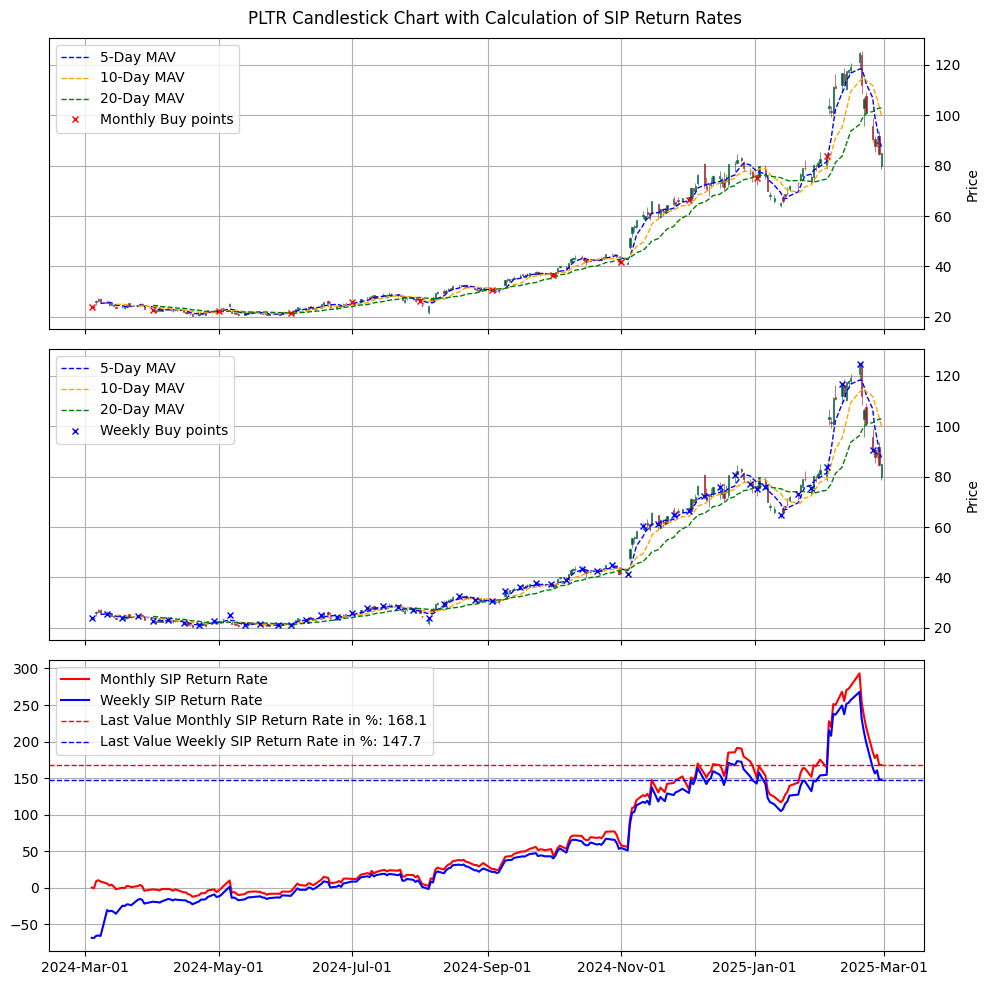

按MA5定投收益率 %:165.3
按MA10定投收益率 %:160.4
按MA20定投收益率 %:172.7
按MA5和MA10的交叉定投收益率 %:184.9
按MA10和MA20的交叉定投收益率 %:171.5


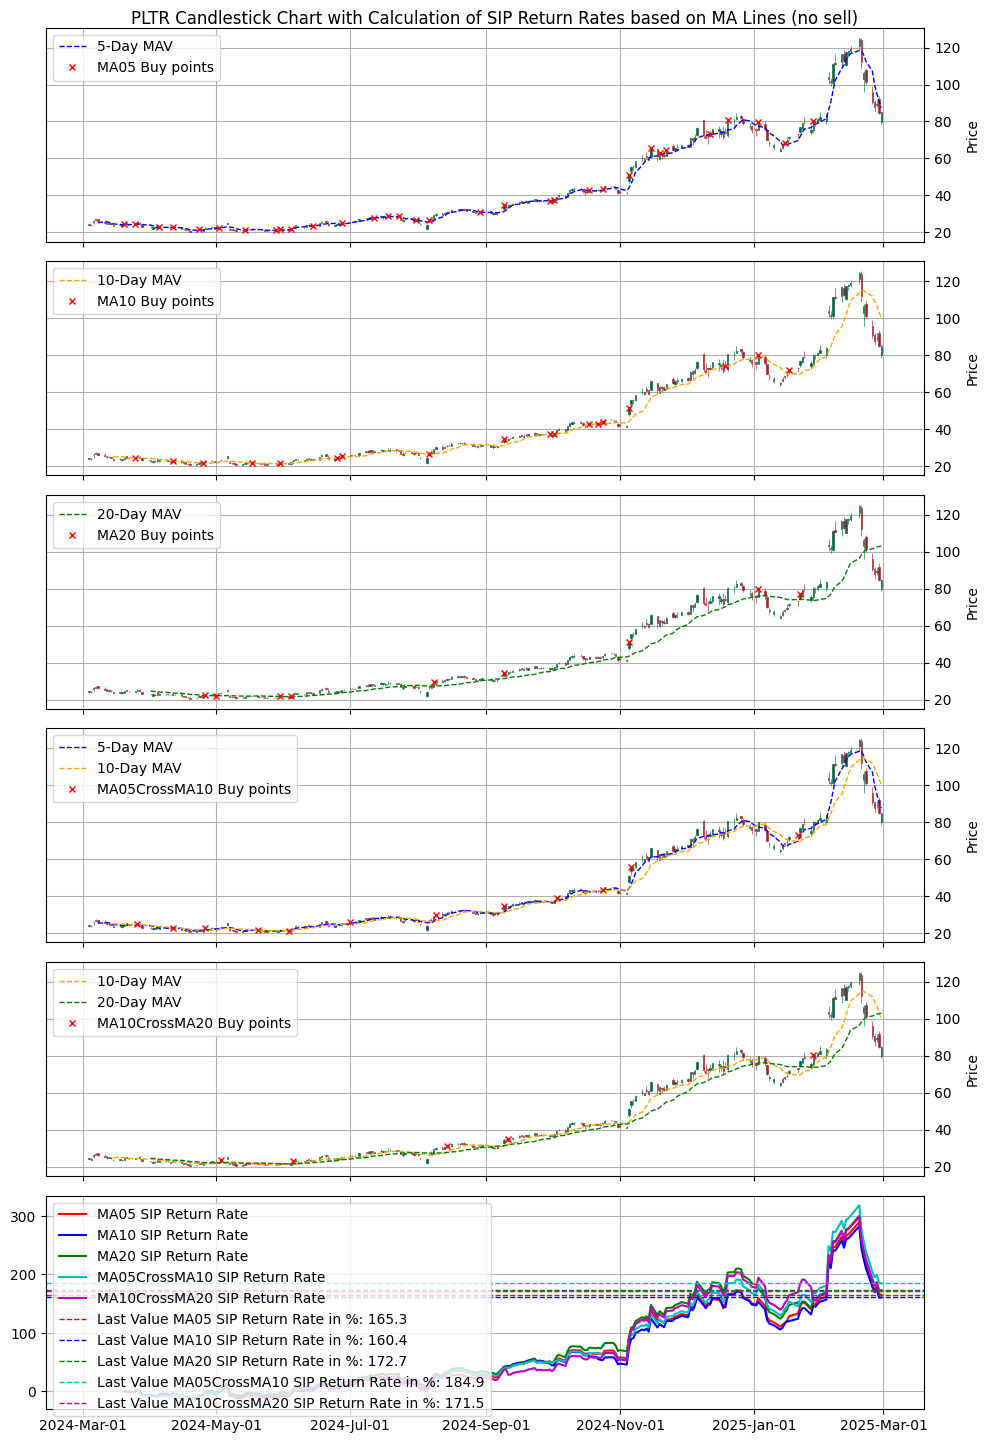

按MA5定投收益率 %:116.7
按MA10定投收益率 %:180.2
按MA20定投收益率 %:130.0
按MA5和MA10的交叉定投收益率 %:100.2


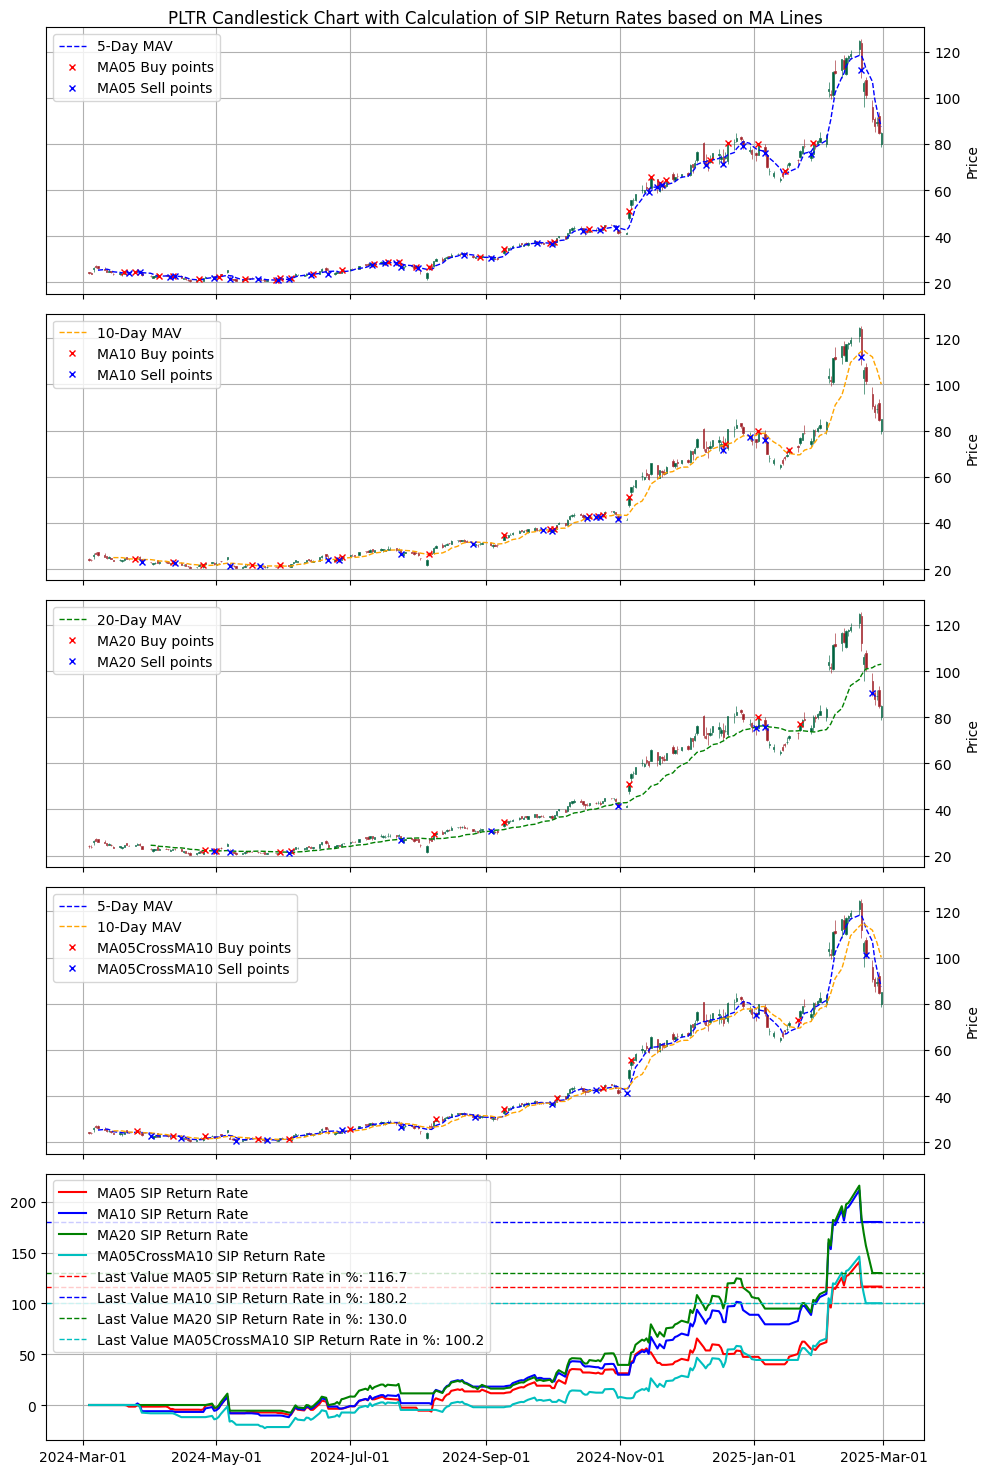

按BB上下轨投资收益率 %:128.9


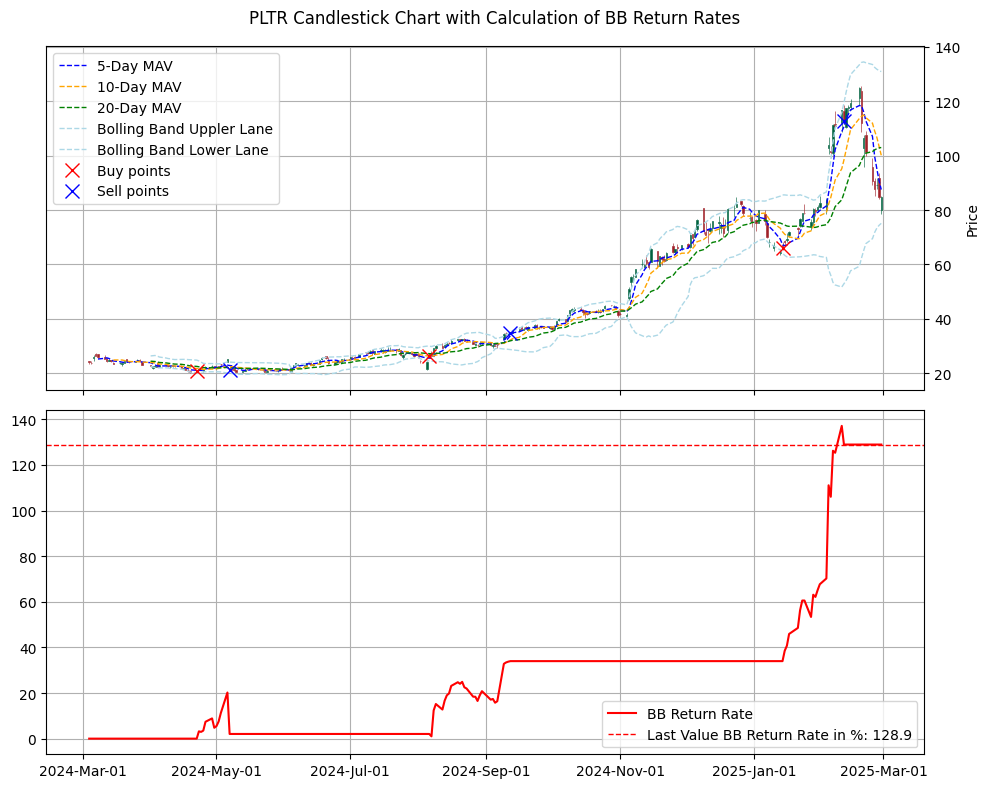

按MACD金叉死叉投资收益率 %:102.6


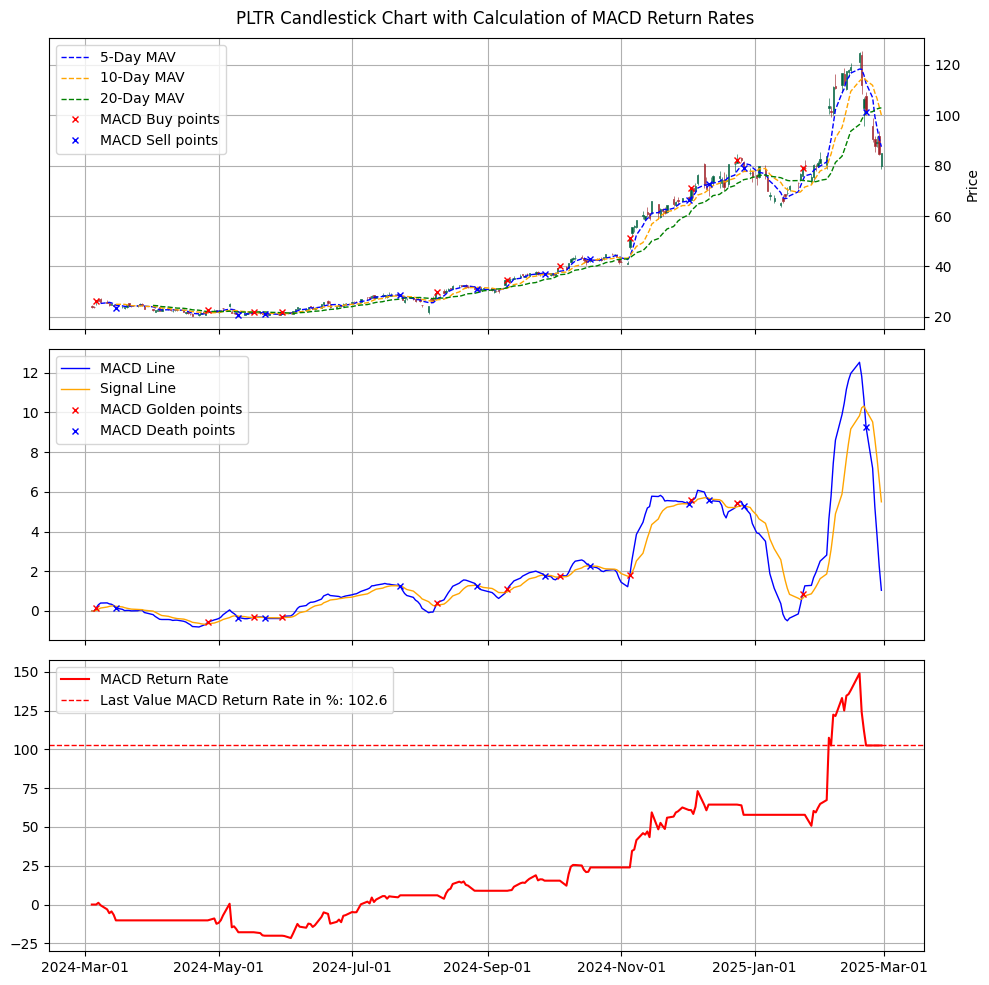

In [ ]:
%matplotlib inline
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days= 365)
SIPReturnCalcn('PLTR',start_date,end_date)

## 计算SP500里所有股票用不同投资策略的投资回报率并保存结果到csv文件中

In [8]:
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365)
ReturnRateRes = Main_Calcn(start_date,end_date)
ReturnRateRes.to_csv('ReturnRateRes.csv',index=True)


Elapsed time: 1.6080 seconds
Elapsed time: 1.6400 seconds
Elapsed time: 1.6600 seconds
Elapsed time: 1.6390 seconds
Elapsed time: 1.6260 seconds
Elapsed time: 1.5830 seconds
Elapsed time: 1.5720 seconds
Elapsed time: 1.5600 seconds
Elapsed time: 1.5710 seconds
Elapsed time: 1.5700 seconds
Elapsed time: 1.5520 seconds
Elapsed time: 1.6010 seconds
Elapsed time: 1.5500 seconds
Elapsed time: 1.5670 seconds
Elapsed time: 1.5520 seconds
Elapsed time: 1.5780 seconds
Elapsed time: 1.5520 seconds
Elapsed time: 1.5570 seconds
Elapsed time: 1.5890 seconds
Elapsed time: 1.5640 seconds
Elapsed time: 1.5610 seconds
Elapsed time: 1.5630 seconds
Elapsed time: 1.5540 seconds
Elapsed time: 1.5760 seconds
Elapsed time: 1.5890 seconds
Elapsed time: 1.5650 seconds
Elapsed time: 1.5550 seconds
Elapsed time: 1.5560 seconds
Elapsed time: 1.7000 seconds
Elapsed time: 1.5550 seconds
Elapsed time: 1.5630 seconds
Elapsed time: 1.5550 seconds
Error on BollBandsReturnCalcn: index 0 is out of bounds for axis 0 with 

## 显示SP500里所有股票用不同投资策略的投资回报率的排序以及列出目前股价最接近布林带下限的股票

In [9]:
ReturnRateRes = pd.read_csv('ReturnRateRes.csv')
# 月定投
top_20 = ReturnRateRes.sort_values(by='Return Rate of MonthlySIP',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MonthlySIP']].to_string(index=False)
print(f'按照月定投收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# 周定投
top_20 = ReturnRateRes.sort_values(by='Return Rate of WeeklySIP',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of WeeklySIP']].to_string(index=False)
print(f'按照周定投收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA05
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA05',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA05']].to_string(index=False)
print(f'按照5日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA10
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA10',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA10']].to_string(index=False)
print(f'按照10日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA20
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA20',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA20']].to_string(index=False)
print(f'按照20日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA5CrossMA10
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA5CrossMA10',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA5CrossMA10']].to_string(index=False)
print(f'按照5日10日均线金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA05_WoSell
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA05_WoSell',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA05_WoSell']].to_string(index=False)
print(f'按照5日均线金叉交易(只买不卖)收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA10_WoSell
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA10_WoSell',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA10_WoSell']].to_string(index=False)
print(f'按照10日均线金叉交易(只买不卖)收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA20_WoSell
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA20_WoSell',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA20_WoSell']].to_string(index=False)
print(f'按照20日均线金叉交易(只买不卖)收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA05CrossMA10_WoSell
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA05CrossMA10_WoSell',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA05CrossMA10_WoSell']].to_string(index=False)
print(f'按照5日10日均线金叉交易(只买不卖)收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MA10CrossMA20_WoSell
top_20 = ReturnRateRes.sort_values(by='Return Rate of MA10CrossMA20_WoSell',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MA10CrossMA20_WoSell']].to_string(index=False)
print(f'按照10日20日均线金叉交易(只买不卖)收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# MACD
top_20 = ReturnRateRes.sort_values(by='Return Rate of MACD',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of MACD']].to_string(index=False)
print(f'按照MACD金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# 布林带
top_20 = ReturnRateRes.sort_values(by='Return Rate of BB',ascending=False).head(20)
top_20_indices_and_values = top_20[['Ticker','Return Rate of BB']].to_string(index=False)
print(f'按照BB金叉死叉交易收益最高的公司(TOP20)列表如下:\n{top_20_indices_and_values}')
# 最佳买入时机股票
top_20 = ReturnRateRes.sort_values(by='Distance of Close2BBLowerLim',ascending=True).head(20)
top_20_indices_and_values = top_20[['Ticker','Distance of Close2BBLowerLim']].to_string(index=False)
print(f'距离布林带下轨距离最小的股票(TOP20)列表如下:\n{top_20_indices_and_values}')

按照月定投收益最高的公司(TOP20)列表如下:
Ticker  Return Rate of MonthlySIP
  PLTR                 285.024203
 XIACF                 129.240329
   VST                  96.044692
  AXON                  90.095471
   UAL                  86.658371
   TPR                  86.230628
   TPL                  83.229133
   GEV                  74.923503
  XPEV                  74.387439
   RCL                  62.772776
   CEG                  57.316275
   HWM                  56.601962
  TSLA                  56.272345
  FTNT                  54.827564
  TRGP                  54.651197
  NFLX                  54.223088
  FFIV                  53.133784
  AVGO                  52.623070
   FOX                  52.496760
  FOXA                  50.062000
按照周定投收益最高的公司(TOP20)列表如下:
Ticker  Return Rate of WeeklySIP
  PLTR                262.492494
 XIACF                119.215804
   TPR                 86.174369
   UAL                 81.662830
  AXON                 81.415861
   VST                 81.147984
  XPE

## 训练LSTM模型预测股价涨跌趋势

In [12]:
# 获取指定股票数据
# stock_ticker = '510300.SS'
stock_ticker = 'NVO'
end_date = datetime.date.today() + pd.offsets.BusinessDay(1)
start_date = end_date - datetime.timedelta(days=365*5)
stock_data = yf.Ticker(stock_ticker).history(start=start_date, end=end_date)
time_step = 50  # time step for the LSTM model
test_size = 0.1 # ratio of test data set in terrms of the whole data set
input_units = 30 
# For Training Data
stock_data['Close_Normalized'] = stock_data['Close']/stock_data['Close'].max()
stock_data['Volume_Normalized'] = stock_data['Volume']/stock_data['Volume'].max()
stock_data['MA05'] = stock_data['Close'].rolling(window=5).mean()/stock_data['Close'].max()
stock_data['MA10'] = stock_data['Close'].rolling(window=10).mean()/stock_data['Close'].max()
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()/stock_data['Close'].max()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()/stock_data['Close'].max()
stock_data['MA100'] = stock_data['Close'].rolling(window=100).mean()/stock_data['Close'].max()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()/stock_data['Close'].max()
stock_data['STD20'] = stock_data['Close'].rolling(window=20).std()/stock_data['Close'].max()
stock_data['BBUpperLim'] = stock_data['MA20']+2*stock_data['STD20']
stock_data['BBBottomLim'] = (stock_data['MA20']-2*stock_data['STD20']).apply(lambda x: np.maximum(x, 0))
# stock_data['BBBottomLim2'] = np.maximum(stock_data['BBBottomLim'],0)
stock_data['EMA12'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
# Calculate the long-term EMA (26 days)
stock_data['EMA26'] = stock_data['Close'].ewm(span=26, adjust=False).mean()
# Calculate MACD line
stock_data['MACD'] = stock_data['EMA12'] - stock_data['EMA26'] 
# Calculate Signal line (9-day EMA of MACD)
stock_data['Signal'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()
stock_data['MACD_Diff'] = stock_data['MACD'] -  stock_data['Signal']
stock_data['MACD_Diff'] = stock_data['MACD_Diff']/stock_data['MACD_Diff'].abs().max()
# 计算RSI
delta = stock_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
stock_data['RSI'] = (100 - (100 / (1 + rs)))/100

stock_data = stock_data.dropna()
x_merged_Training =pd.concat([stock_data['Close_Normalized'],stock_data['Volume_Normalized'],stock_data['MA05'],stock_data['MA10'],stock_data['MA20'],stock_data['MA50'],stock_data['MA100'],stock_data['MA200'],stock_data['BBBottomLim'],stock_data['BBUpperLim'],stock_data['MACD_Diff'],stock_data['RSI']], ignore_index=True)
correlation_matrix = pd.DataFrame({
    'Close_Normalized': stock_data['Close_Normalized'],
    'Volume_Normalized': stock_data['Volume_Normalized'],
    'MA05': stock_data['MA05'],
    'MA10': stock_data['MA10'],
    'MA20': stock_data['MA20'],
    'MA50': stock_data['MA50'],
    'MA100': stock_data['MA100'],
    'MA200': stock_data['MA200'],
    'BBBottomLim': stock_data['BBBottomLim'],
    'BBUpperLim': stock_data['BBUpperLim'],
    'MACD_Diff': stock_data['MACD_Diff'],
    'RSI': stock_data['RSI']
}).corr()
x_merged_Training = np.array(x_merged_Training).reshape(-1,stock_data.shape[0]).T
def extract_data(data,time_step):
     X=[]    
     y=[]
     for i in range(len(data)-time_step):
         X.append([a for a in data[i:i+time_step]])
         y.append(data[i+time_step,0]-data[i+time_step-1,0]>0)
     X = np.array(X)
     X.reshape(X.shape[0],X.shape[1],data.shape[1])
     y=np.array(y)
     return X,y
X_Training,y_Training=extract_data(x_merged_Training,time_step)
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X_Training, y_Training, test_size=0.1, random_state=42)
# 构建 LSTM 模型
model = Sequential()
model.add(Input(shape=(time_step, X_Training.shape[2])))  # 添加输入层
# model.add(LSTM(input_units,kernel_regularizer=l2(0.01),return_sequences=True,recurrent_dropout=0.2))
model.add(LSTM(input_units,kernel_regularizer=l2(0.01),return_sequences=True))
# model.add(LSTM(input_units,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(input_units, kernel_regularizer=l2(0.01),recurrent_dropout=0.2))
model.add(LSTM(input_units, kernel_regularizer=l2(0.01)))
# model.add(LSTM(input_units))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_Training,y_Training,batch_size=30,epochs=1000)
early_stopping = EarlyStopping(monitor='accuracy', patience=100, restore_best_weights=True)
model.fit(X_train,y_train,batch_size=30,epochs=1000,verbose=0,callbacks=[early_stopping])
model.summary()
loss_test, accuracy_test = model.evaluate(X_test, y_test, batch_size=1)
loss_train, accuracy_train = model.evaluate(X_train, y_train, batch_size=1)
# # 评估模型
# y_pred_prob = model.predict(X_test)
# y_pred = (y_pred_prob > 0.5).astype(int)
# accuracy2 = accuracy_score(y_test, y_pred)
print(f'训练集预测精确度: {accuracy_train:.4f}')
print(f'测试集预测精确度: {accuracy_test:.4f}')
pred_result=model.predict(x_merged_Training[-time_step:].reshape(1,time_step,x_merged_Training.shape[1]))[0,0]
if model.predict(x_merged_Training[-time_step:].reshape(1,time_step,x_merged_Training.shape[1]))>0.5:
    print(f'预测明日涨跌为：涨,数值为：{pred_result:.4f}')
else:
    print(f'预测明日涨跌为：跌,数值为：{pred_result:.4f}')

plt.figure(figsize=(10, 8))  # 设置图表大小

# 使用 seaborn 的 heatmap 函数绘制热力图
sns.heatmap(
    correlation_matrix,
    annot=True,  # 显示具体数值
    fmt=".2f",   # 数值保留两位小数
    cmap='coolwarm'  # 颜色映射（可选）
)

plt.title('Correlation Matrix Heatmap')  # 添加标题
plt.xlabel('Features')                   # 设置 x 轴标签
plt.ylabel('Features')                   # 设置 y 轴标签

# 显示图表
plt.show()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50, 30)         │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 30)             │         7,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,535 (146.62 KB)

 Trainable params: 12,511 (48.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,024 (97.75 KB)

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4439 - loss: 1.0861
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7468 - loss: 0.4747
训练集预测精确度: 0.7472
测试集预测精确度: 0.4851
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
预测明日涨跌为：跌,数值为：0.0561


In [14]:
print(ReturnRateRes.columns)

Index(['Ticker', 'Return Rate of MA05', 'Return Rate of MA10',
       'Return Rate of MA20', 'Return Rate of MonthlySIP',
       'Return Rate of WeeklySIP', 'Distance of Close2BBLowerLim',
       'Return Rate of MA5CrossMA10', 'Return Rate of MA05_WoSell',
       'Return Rate of MA10_WoSell', 'Return Rate of MA20_WoSell',
       'Return Rate of MA05CrossMA10_WoSell',
       'Return Rate of MA10CrossMA20_WoSell', 'Return Rate of MACD',
       'Return Rate of BB'],
      dtype='object')
